In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from utils import plot_2d, plot_classifier_boundary
from sklearn.model_selection import GridSearchCV

# LINEAR performing better

In [2]:
#features between 1700-2300



def G_SVC_linear(n):

    X,y = datasets.make_classification(n_samples=100, n_features=n,
                                       n_clusters_per_class=1,
                                       n_redundant=0,
                                       class_sep=2)
    
    return X, y

In [3]:
list_linear = {}
list_rbf = {}





for n in range(1400, 3000, 50):
    print(n)
    
    lista = []
    lista2 = []

    for i in range(100):

    

        X_lin, y_lin = G_SVC_linear(n)
        X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=.33)
        model_linear = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
        model_rbf = SVC(kernel='rbf', random_state=42).fit(X_train, y_train)

        lista.append((model_linear.score(X_test, y_test) * 100))
        lista2.append(model_rbf.score(X_test, y_test) * 100)

    list_linear[n] = sum(lista)/len(lista)
    list_rbf[n] = sum(lista2)/len(lista2)




            #list_linear.append((model_linear.score(X_test, y_test) * 100))
            #list_rbf.append((model_rbf.score(X_test, y_test) * 100))





1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950


In [4]:
(np.array(list(list_linear.values())) - np.array(list(list_rbf.values())))

array([27.51515152, 26.72727273, 28.45454545, 29.03030303, 29.3030303 ,
       26.60606061, 26.96969697, 28.87878788, 28.75757576, 30.90909091,
       27.42424242, 28.84848485, 29.21212121, 27.6969697 , 29.12121212,
       27.12121212, 27.63636364, 29.48484848, 28.72727273, 27.24242424,
       28.87878788, 27.84848485, 29.60606061, 27.66666667, 28.18181818,
       28.24242424, 27.45454545, 28.18181818, 29.15151515, 28.24242424,
       27.72727273, 27.06060606])

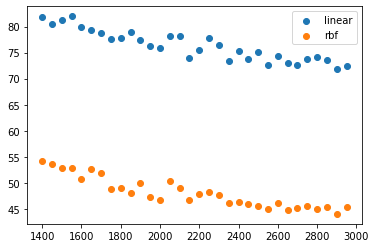

In [5]:
plt.scatter(list_linear.keys(), list_linear.values(), label='linear')
plt.scatter(list_rbf.keys(), list_rbf.values(), label='rbf')
plt.legend()

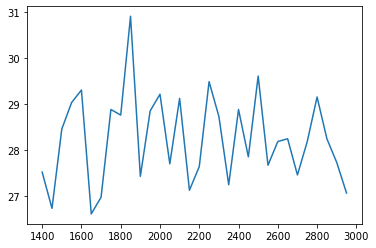

In [6]:
plt.plot(list_linear.keys(), [i - j for i, j in zip(list_linear.values(), list_rbf.values())])

# RBF performing better

In [30]:
def G_SVC_RBF():
    
    X, y = datasets.make_circles(n_samples=(1000), noise=0.1, factor=0.7)
    
    return X, y

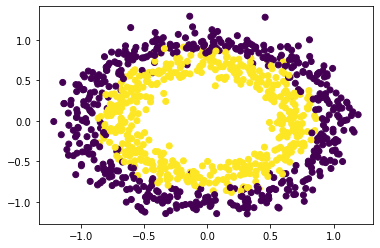

In [31]:
X_rbf, y_rbf = G_SVC_RBF()

plt.scatter(X_rbf[:, 0], X_rbf[:, 1], c=y_rbf)

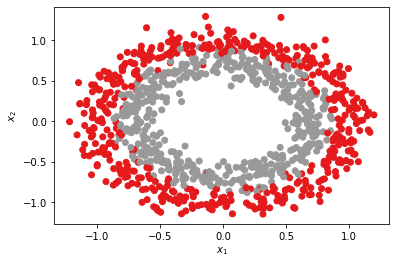

In [32]:
plot_2d(X_rbf, y_rbf)

In [33]:
X_rbf.shape[1]

2

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_rbf, y_rbf, test_size=.33)
model_linear = SVC(kernel='linear', C=0.001, random_state=42).fit(X_train, y_train)
model_rbf = SVC(kernel='rbf', C=20, random_state=42).fit(X_train, y_train)

In [43]:
model_linear.score(X_test, y_test) * 100


49.09090909090909

In [44]:
model_rbf.score(X_test, y_test) * 100

92.72727272727272

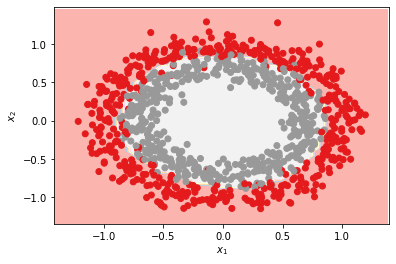

In [45]:
plot_classifier_boundary(model_rbf, X_rbf, y_rbf)

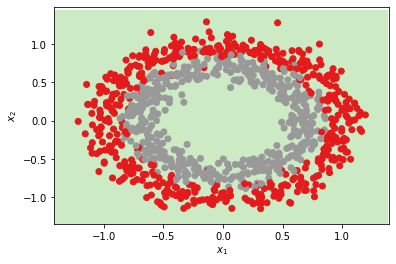

In [46]:
plot_classifier_boundary(model_linear, X_rbf, y_rbf)

In [27]:
param_grid = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100], 'kernel': ['linear']}


grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'kernel': ['linear']})

In [29]:
grid.best_params_

{'C': 0.001, 'kernel': 'linear'}

In [40]:
param_grid = {'C': [0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100], 'kernel': ['rbf']}


grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'kernel': ['rbf']})

In [41]:
grid.best_params_

{'C': 20, 'kernel': 'rbf'}